# Data Science

***


WS 2022

Dr. Cristian Grozea


***

## Introduction to Machine Learning


# Course Plan

1. Introduction to Machine Learning (ML)
    * Examples of Applications
    * Types of machine learning
    * Issues around ML
    * Testing and Validation
1. Classification and Regression
    * Datasets
    * Binary classification
    * Accuracy measures
    * Multiclass classification
1. Various model types and Training models
    * Linear regression
    * Polynomial regression
    * Regularisation
    * Logistic Regression
1. Support Vector Machines
1. Decision Trees
1. Ensemble Learning and Random Forest
1. Dimensionality Reduction
1. Unsupervised Learning

    


# Introduction to Machine Learning

## Definition

``Machine learning is the science (and art) of programming computers so they can
learn from data.''


[Machine learning is the] field of study that gives computers the ability to learn
without being explicitly programmed.
—Arthur Samuel, 1959

https://en.wikipedia.org/wiki/Mechanical_Turk



## Why do this at all? vs. explicit engineering

### Hand-engineered version

(illustration from the HandsOn-ML3 book)

Detection of SPAM emails

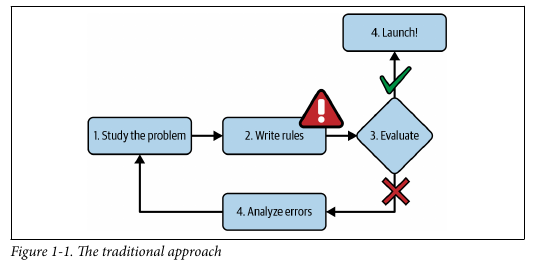

YES
``Subject: Congratulations! you won the lottery''

---

YES 
Body:

Dear Manager,

Good morning, glad to send this email to you. 

...

---

NO
``Subject: [colt] [Social Networks, Deadline Nov. 1] Call for Papers in ICC 2023''




What if the spammers change keywords, introduce typos, etc?

## Why do this at all? vs. explicit engineering

### ML-version

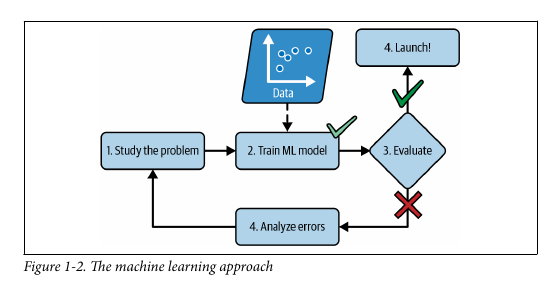


* Implicit *model* instead of explicit *rules*
    * the model can be itself a set of rules 
    * but usually it is just a numerical function
* Can it be trusted?
* How to properly check it works correctly?
* Can it be explained? 
    * Explainable AI (XAI)

# Example of Applications
## Self Driving

https://xkcd.com/1897/

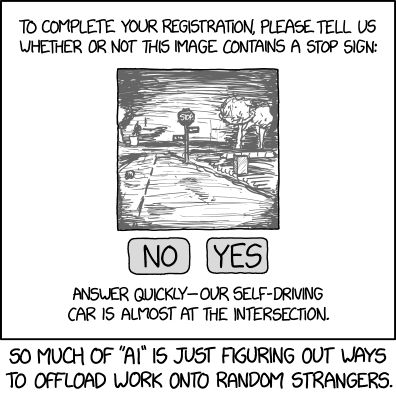

https://en.wikipedia.org/wiki/Amazon_Mechanical_Turk

# Example of Applications

* Classify objects in images (``image classification'')
    * e.g. car/bike/person/tree
    * bounding boxes
        
* Detect cancer in tissue images (``image segmentation'')
    * tell about each pixel to what category it belongs: normal tissue vs tumor
    
* Classify text pieces (``NLP'' Natural Language Processing)
    * positive/negative review?
        * e.g.: "it is not bad at all"
        
* Create document summaries automatically (NLP again)

* Scan forum contributions for offensive text (NLP)

* Scan your CV when you apply for a job (NLP)

* Chatbots (NLP)

* Forecast revenues/demand/whatever else (``Regression'')

* Understand voice (``speech understanding'')
    * personal assistents: Siri/Alexa/{Cortana}

* Detect suspect credit card transactions / potential fraud (``Anomaly detection'')

* Detect suspect network traffic / potential attacks (``Anomaly detection'' again)




# Example of Applications

* Present highly dimensional data in a meaningful way (``Visualisation'')
* Intelligent agents (``Reinforcement Learning'')
    - be it for self-driving cars
    - or bots for games 
        - e.g. AlphaGo, Alpha-Zero, etc.
* Recommend products based on previous purchases (``Recommender Systems'')
    - Amazon
    - Netflix
* Group data based on similarity (``Clustering'')    
    - for visualisation
    - or as a preprocessing step
    


    

## Types of Machine Learning

* Supervised?
    * Supervised
        * the behavior is tuned based on labeled samples
    * Self-supervised
        * the labels are generated automatically from data -> turns into supervised
            * e.g. time series, video compression
    * Unsupervised
        * no labels are available
    * Semi-supervised
        * only some of the training samples have labels
    * Reinforcement Learning
        * more complex setup
        * the behaviour of the agent is rewarded or penalized, not necessarily at every step
            * chess


## Types of Machine Learning


* Online?
    * Batch
        * all training samples are available upfront and are used to produce the model
    * Online
        * the model is continuously adjusted with further samples, initially not available
        
* Parametric? (from statistical models)
    * Model-based (parametric)
        * The model is fixed but has parameters for which one has to find the best values
    * Non-parametric (non-parametric, purely data-driven)
        * There is no model/formula/network structure, etc.
        * similarity with the labeled data is the only thing that matters
        
    
    
    
 

# Challenges in ML

* Generalization
    * Overfitting
    * Underfitting
* Data availability
    * quantity
    * quality
        * outliers
* Trust / Test & Validation
    * put AI in charge?
        * killing bots / war
        * self driving
        * automatic decisions
            * grant / refuse bank credits
            * select for hiring interview
        * medical diagnostic
            * error vs risk
        
    

# Challenges in ML

* Non-representative data
    * shift / trends
    * bias
        * medical models trained only on white people, etc.
        * refuse all (bank) credit requests of non-white people?
        * bad images when dark skin people photographed
        [https://www.wsj.com/articles/google-built-the-pixel-6-camera-to-better-portray-people-with-darker-skin-tones-does-it-11635177665]
        
        
    

# Python Example

## Regression=Interpolation

### Data

$x_1,...x_n$

$y_1,...,y_n$



In [18]:
x=[0,1,2,3,4,6]
y=[0.9,2.5,5.2,6.8,9,13.5]

We look for a function $f$ such that $f(x_i)=y_i$, $\forall i\in\{1\ldots n\}$

Supervised! - we have labels: $(y_i)_{i=1\ldots n}$


Parametric? Our choice

We look for a function $f$ such that $f(x_i)=y_i$, $\forall i\in\{1\ldots n\}$

Parametric has advantages:
* less data needed
* might be a way to impose consistence with known laws (physics/economics)
* can be very robust


### Linear models

$$y=a*x+b$$

### Parameters

$$a,b\in \mathbf{R}$$

Slope $a$, intercept $b$

### Look at the data

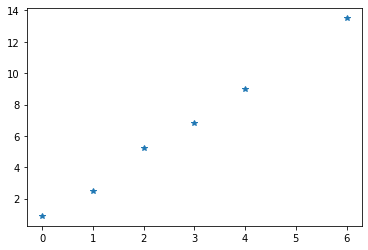

In [19]:
import matplotlib.pyplot as plt
plt.plot(x,y,'*')

### Look at the models

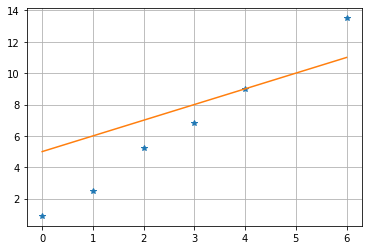

In [21]:
plt.plot(x,y,'*')
plt.grid(1)

y1=[1*xi+5 for xi in x]
plt.plot(x,y1)


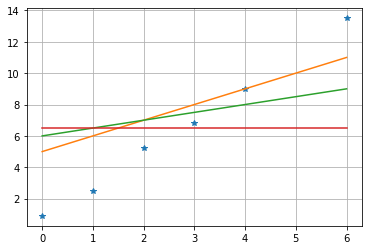

In [37]:
plt.plot(x,y,'*')
plt.grid(1)

pred1=[1*xi+5 for xi in x]
plt.plot(x,pred1)

pred2=[0.5*xi+6 for xi in x]
plt.plot(x,pred2)

pred3=[0*xi+6.5 for xi in x]
plt.plot(x,pred3)



### Goal: find the ``best'' values for $a$ and $b$

The predictions $\hat y_i$ should be as close as possible to the true values $y_i$

### Measure deviation / distance between $\hat y$ and $y$

Error $e=y-\hat y$ ?

Pointwise $e_i=y_i-\hat y_i$

Aggregate  $\sum_{i=1}^{n}(y_i-\hat y_i)$ ?


Better: $$\sum_{i=1}^{n}(y_i-\hat y_i)^2$$

Squared Euclidean distance between $y$ and $\hat y$ 

Even better, the mean squared error (MSE): $$\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat y_i)^2$$

### Error Measurement

Loss in the point $x_i$: a function of $y_i$ and $\hat y_i$
$$loss(y_i,\hat y_i)$$




Squared Error: $$loss(c,d)=(c-d)^2$$

-> MSE

Absolute Error: 
    $$loss(c,d)=| c-d |$$
    
which leads to the mean absolute error (MAE):
$$\frac{1}{n}\sum_{i=1}^{n}|y_i-\hat y_i|$$

### Link with geometry

Distance between two points $y$ and $\hat y$ $\in \mathbb{R}^n$



### Distance from norm

$$d(c,d)=norm(c-d)$$

### Norms
* $l_1(e)=||e||_1=\sum_i|e_i|$
* $l_2(e)=||e||_2=\sqrt{\sum_i(e_i^2)}$
* $l_\infty(e)=||e||_\infty=max_i|e_i|$

All norms are mathematically equivalent on finite-dimensional real spaces.

See [https://math.stackexchange.com/questions/57686/understanding-of-the-theorem-that-all-norms-are-equivalent-in-finite-dimensional]

### Link with statistics

### MSE

$$\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat y_i)^2$$

$$=\frac{1}{n}\sum_{i=1}^{n}(e_i)^2$$

$$=E((e_i)_i^2)$$, 

$$=Var((e_i)_i)$$ 

assuming E(e_i)=0 - i.e. when $\hat y$ is an unbiased estimator of $y$, $E(\hat y)=E(y)$


In [50]:
def mse(yhat,y):
    s=0
    n=len(y)
    for i in range(n):
        s+=(yhat[i]-y[i])**2
    return s/n

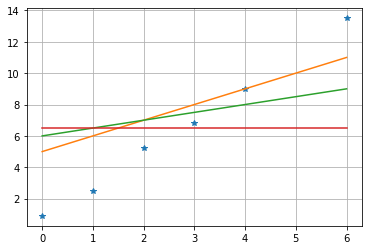

In [51]:
plt.plot(x,y,'*')
plt.grid(1)
plt.plot(x,pred1)
plt.plot(x,pred2)
plt.plot(x,pred3)

In [52]:
mse(pred1,y)

6.664999999999999

In [53]:
mse(pred2,y)

11.165000000000001

In [54]:
mse(pred3,y)

17.398333333333333

In [93]:
def prediction_quality(a,b,x,y):
    pred=[a*x_+b for x_ in x]
    return mse(pred,y)

### Ranges
Search best values for $a,b\in [0,10]$
### Domain resolution

In [70]:
D=100
def myrange(D,mx):
    return [x/D*mx for x in range(D)]

In [75]:
attempts=[prediction_quality(a,b,x,y) for a in myrange(D,10) for b in myrange(D,10)]
a_values=[a for a in myrange(D,10) for b in myrange(D,10)]
b_values=[b for a in myrange(D,10) for b in myrange(D,10)]

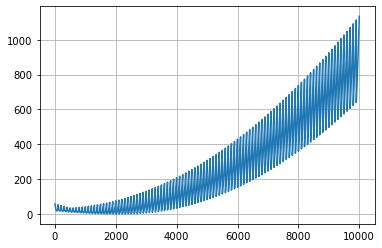

In [85]:
plt.plot(attempts)
plt.grid(1)

In [86]:
min(attempts)

0.05166666666666669

In [87]:
idx=attempts.index(min(attempts))
idx

2107

In [90]:
a_best=a_values[idx]
a_best

2.1

In [91]:
b_best=b_values[idx]
b_best

0.7000000000000001

### Our model

$$f(x)=2.1x+0.7$$

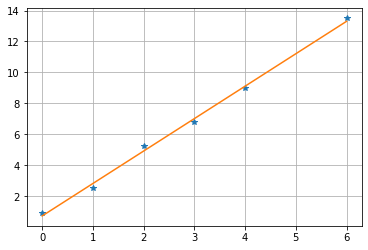

In [92]:
plt.plot(x,y,'*')
plt.grid(1)
best_pred=[a_best*x_+b_best for x_ in x]
plt.plot(x,best_pred)

# Conclusion

## ML is no magic, just math!

https://www.explainxkcd.com/wiki/index.php/1838:_Machine_Learning
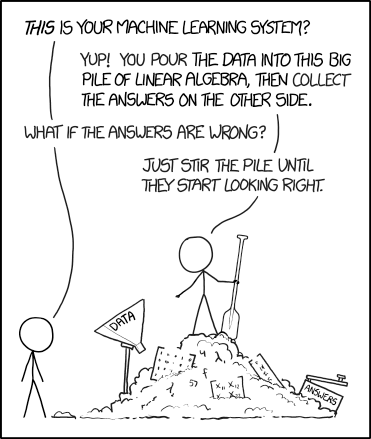